In [ ]:
# Chaitanya Mangla AI - DS B1
#Geospatial Crime HotspotIdentificaation 
# Use DBSCAn Clustering to identify dense graphicregions that represent crime hotspots from location data
import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np


In [7]:
# By applying the parameters 
num_clusters = 3 
points_per_cluster = 50
noise_points = 20

In [8]:
# Cluster centers (latitude, longitude)
cluster_centers = [
    (40.7128, -74.0060),  # NYC
    (40.730610, -73.935242),  # Brooklyn
    (40.7527, -73.9772)  # Manhattan
]

In [9]:
# Standard Deviation for Clusters 
cluster_std = 0.01

In [10]:
# Generating of clusters 
all_points = []
all_points = []
for center in cluster_centers:
    lat_center, lon_center = center
    lats = np.random.normal(lat_center, cluster_std, points_per_cluster)
    lons = np.random.normal(lon_center, cluster_std, points_per_cluster)
    cluster_points = np.column_stack((lats, lons))
    all_points.append(cluster_points)


In [11]:
# Generate Random Noise Points 
noise_lats = np.random.uniform(40.70, 40.76, noise_points)
noise_lons = np.random.uniform(-74.02, -73.93, noise_points)
noise_points_array = np.column_stack((noise_lats, noise_lons))


In [12]:
# Combine clusters and noise
all_points.append(noise_points_array)
all_points = np.vstack(all_points)

# Create DataFrame
synthetic_data = pd.DataFrame(all_points, columns=['Latitude', 'Longitude'])

synthetic_data

,Latitude,Longitude
0,40.708654,-74.010706
1,40.696385,-73.996655
2,40.730332,-74.011988
3,40.705025,-73.997081
4,40.709267,-74.035186
...,...,...
165,40.741846,-74.014263
166,40.743034,-74.014726
167,40.715449,-74.013201
168,40.700747,-73.949131


In [13]:
# Apply DBSCAN Clustering n synthetic data 
from sklearn.cluster import DBSCAN

# Convert to radians for haversine
coords_rad = np.radians(synthetic_data[['Latitude', 'Longitude']].to_numpy())
kms_per_radian = 6371.0088
epsilon = 0.5 / kms_per_radian  # 0.5 km radius

db = DBSCAN(eps=epsilon, min_samples=5, metric='haversine')
db.fit(coords_rad)

synthetic_data['Cluster'] = db.labels_

print(synthetic_data['Cluster'].value_counts())

Cluster
-1    64
 5    30
 0    28
 3    18
 2    12
 1     9
 4     9
Name: count, dtype: int64


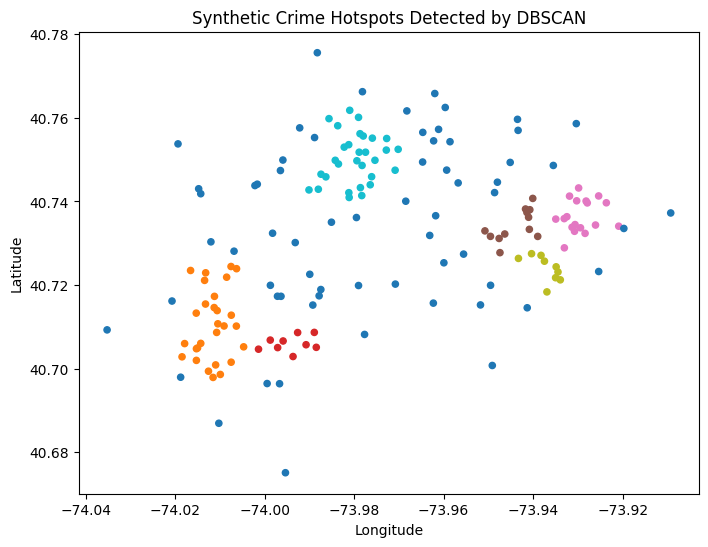

In [ ]:
# Visualizing the synthetic Hotspots of the crime
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(synthetic_data['Longitude'], synthetic_data['Latitude'], c=synthetic_data['Cluster'], cmap='tab10', s=20)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Synthetic Crime Hotspots Detected by DBSCAN")
plt.show()
